## **Pre-Modelling Explanations**

In [1]:
from utils import *

## **Exploratory Data Analysis**

**1. Dataset Overview and Statistics**
- *What are we working with?* Start by characterizing the data relatively to the number of observations, number and types of features, overall missing rate and percentage of duplicate observations

**2. Feature Assessment and Visualization**
- *How to understand the features and its relations?* Get insights on our features' individual properties - Univariate Analysis - as well as their interactions and relationships - Multivariate Analysis.


**3. Data Quality Evaluation**
- *What type of errors may we be dealing with?* Deeply understand and mitigate some data errors that can become complicating factors to a Machine Learning approach

### **1. Dataset Overview and Statistics**

In [2]:
df = pd.read_csv('data.csv', sep=';')  # Load your dataset here
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<span style="color:red">**Acho que isto não devia estar aqui. o mapping do gui estava ao contrario**</span>

In [ ]:
# Describe the dataset to get summary statistics - see Miriam's paper!!!!

### **2. Feature Assessment and Visualization**

#### **2.1. Univariate Analysis**

Analysis the individual characteristics of each feature, to further help on decisions such as their relevance for the analysis itself and the type of data preparation required to achieve our project goals. 

- **Numerical Features:** most often comprise information regarding mean, standard deviation, skewness, kurtosis, and other quantile statistics, and are best represented using histogram plots

- **Categorical Features:** usually described using the mode and frequency tables, and represented using bar plots for category analysis.

------------
- <span style="color:green">descriptive statistics of each feature + data distribution</span>
- <span style="color:red">outliers/inconsistencies</span>
- <span style="color:red">standardize numerical data</span>
- <span style="color:red">perform one-hot encoding to categorical features</span>




**2.1.1. Descriptive statistics and Feature distribution** 

The dataset was collected to enable early identification of at-risk students, including information available at enrollment (e.g. academic background, demographics, socio-economic status) and academic performance after the 1st and 2nd semesters.

These features can be grouped into several categories:

- Demographic data;

- Socio-economic data;

- Macro-economic data;

- Academic data at enrollment;

- Academic data at the end of 1st semester;

- Academic data at the end of 2nd semester;

- Target;

Lets see how they behave
    

**A) Demographic Data:**
- Marital Status
- Nationality
- Displaced
- Gender
- Age at enrollment
- International 

As mentioned before, we will treat Marital status, Nacionality, Displaced, Gender and International as categorical features. The remaining one, Age at enrollment will be treated as its data type (numerical)

In [ ]:
demographic_features = ['Marital status', 'Nacionality', 'Displaced', 'Gender', 'Age at enrollment', 'International']

numerical_demographic = ["Age at enrollment"]
categorical_demographic = ["Marital status", "Nacionality", "Gender", "Displaced", "International"]

In [103]:
# 1. Numerical Features Statistics
def numerical_feature_stats(feature_name, df):
    '''
    compute statistics for a given feature in the dataframe: total count, distinct count (%), missing count (%), memory size, mean, std, coefficient of variation, min, 25%, median(50%), 75%, max.
    args:
        feature_name (str)
        df (pd.DataFrame)
    returns:
        dict: dictionary containing various statistics about the feature.
    '''
    feature = df[feature_name]
    stats = {}
    stats['total_count'] = len(feature)
    distinct_count = feature.nunique(dropna=True)
    stats['distinct_count'] = distinct_count / len(feature)  
    missing_count = feature.isnull().sum()
    stats['missing_count(%)'] = (missing_count / len(feature)) * 100
    memory_size = feature.memory_usage(deep=True)
    stats['memory_size(bytes)'] = memory_size

    # Compute descriptive statistics
    stats['mean'] = feature.mean()
    stats['std'] = feature.std()
    if feature.mean() != 0:
        stats['coefficient of variation'] = stats['std'] / stats['mean']
    stats['min'] = feature.min()
    stats['25%'] = feature.quantile(0.25)
    stats['median(50%)'] = feature.median()
    stats['75%'] = feature.quantile(0.75)
    stats['max'] = feature.max()
    if feature.mean() != 0:
        stats['coefficient of variation'] = stats['std'] / stats['mean']
    
    return stats

def detect_outliers(feature_name, df, multiplier=1.5):
    '''
    detect outliers in numerical features using the IQR rule --> every point outside the Q1 - 1.5*IQR and Q3 + 1.5*IQR is considered an outlier.
    args:
        feature_name (str)
        df (pd.DataFrame)
        multiplier (float): multiplier for the IQR to define outlier boundaries (1.5 from documentation)
    returns:
        numerical_outliers (pd.Series): series containing the outlier values.
        outliers_perc (float): percentage of outliers in the feature.
        lower_bound (float): lower bound for outlier detection. (for plotting the boxplot)
        upper_bound (float): upper bound for outlier detection.(for plotting the boxplot)
    '''
    feature_data = df[feature_name].dropna()
    Q1, Q3 = np.percentile(feature_data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    numerical_outliers = feature_data[(feature_data < lower_bound) | (feature_data > upper_bound)]
    outliers_perc = (len(numerical_outliers) / len(feature_data)) * 100
    return numerical_outliers, outliers_perc, lower_bound, upper_bound


# 2. Categorical Features Description
def categorical_feature_desc(feature_name, df):
    '''
    describes a given categorical feature: total count, distinct categories, missing count (%), most frequent category, memory size.
    args:
        feature_name (str)
        df (pd.DataFrame)
    returns:
        dict: dictionary containing various descriptions about the categorical feature.
    '''
    feature = df[feature_name]
    descriptions = {}
    descriptions['total_count'] = len(feature)
    distinct_count = feature.nunique(dropna=True)
    descriptions['distinct_categories'] = distinct_count
    missing_count = feature.isnull().sum()
    descriptions['missing_count(%)'] = (missing_count / len(feature)) * 100
    memory_size = feature.memory_usage(deep=True)
    most_frequent = feature.mode().iloc[0] if not feature.mode().empty else np.nan
    descriptions['most_frequent_category'] = most_frequent
    descriptions['memory_size(bytes)'] = memory_size

    return descriptions


def rare_categories(feature_name, df, threshold=0.01):
    '''
    identify rare categories in a categorical feature based on a frequency threshold.
    args:
        feature_name (str)
        df (pd.DataFrame)
        threshold (float): frequency threshold to consider a category as rare (set to 1%)
    returns:
        rare_categories (pd.Series): series containing the rare categories and their frequencies.
        rare_categories_perc (float): percentage of rare categories among all distinct categories.
    '''
    feature_data = df[feature_name].dropna()
    value_counts = feature_data.value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold]
    rare_categories_perc = len(rare_categories) / len(value_counts) * 100
    # print(rare_categories)
    # print(len(rare_categories))
    return rare_categories, rare_categories_perc
    

def render_numerical_feature(feature_name, df, bins=30, bar_width=3):
    '''
    
    '''
    stats = numerical_feature_stats(feature_name, df)
    numerical_outliers, outliers_perc, lower_bound, upper_bound = detect_outliers(feature_name, df)
    feature = df[feature_name].dropna()
    stats_df = pd.DataFrame(stats.items(), columns=["Metric", "Value"])
    stats_df["Value"] = stats_df["Value"].apply(lambda x: f"{x:,.4f}" if isinstance(x, (int, float)) else x)

    fig, (ax_table, ax_hist, ax3_box) = plt.subplots(1, 3, figsize=(15, 4))

    # Outliers Boxplot
    sns.boxplot(x=feature, ax=ax3_box, color="#CAE08DB4", orient="h")
    ax3_box.axvline(lower_bound, color='red', linestyle='--')
    ax3_box.axvline(upper_bound, color='red', linestyle='--')
    ax3_box.set_title(f"{feature_name} Boxplot (IQR Outliers)")

    # Histogram -- Feature Distribution
    sns.histplot(feature, bins=bins, kde=True, ax=ax_hist, shrink=bar_width, color="#93C5D4")
    ax_hist.set_title(f"{feature_name} Distribution")
    ax_hist.set_xlabel(feature_name)
    ax_hist.set_ylabel("Count")

    # stats table
    ax_table.axis("off")
    ax_table.text(0.02, 1.05, "Summary statistics", fontsize=11, weight="bold", family="DejaVu Sans")
    y_start = 0.95
    y_step = 1.0 / (len(stats_df) + 2)
    font_family = "DejaVu Sans"
    ax_table.text(0.02, y_start, "Metric", weight="bold", fontsize=10, family=font_family)
    ax_table.text(0.98, y_start, "Value", weight="bold", fontsize=10, family=font_family, ha="right")

    y = y_start - y_step
    for i, (metric, value) in enumerate(stats_df.values):
        y_mid = y - (y_step / 2)
        ax_table.text(0.02, y_mid, metric, fontsize=9.5, family=font_family, color="#333", va="center")
        ax_table.text(0.98, y_mid, value, fontsize=9.5, family=font_family, color="#333", ha="right", va="center")
        ax_table.plot([0.02, 0.98], [y - y_step, y - y_step], color="#D3D3D3", lw=0.6)
        y -= y_step

    plt.tight_layout()
    plt.show()


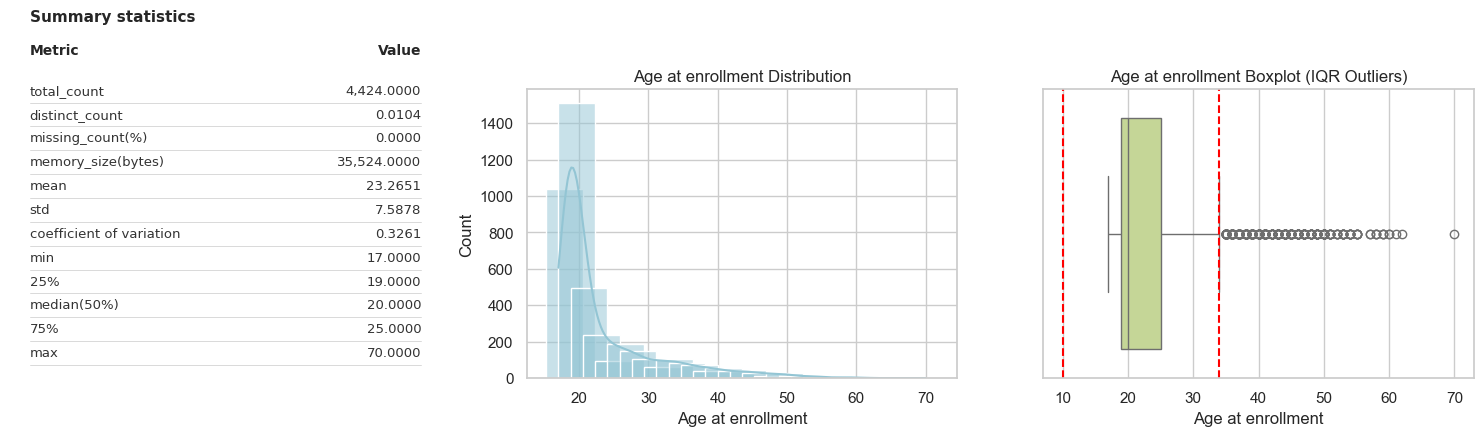

In [104]:
render_numerical_feature("Age at enrollment", df)

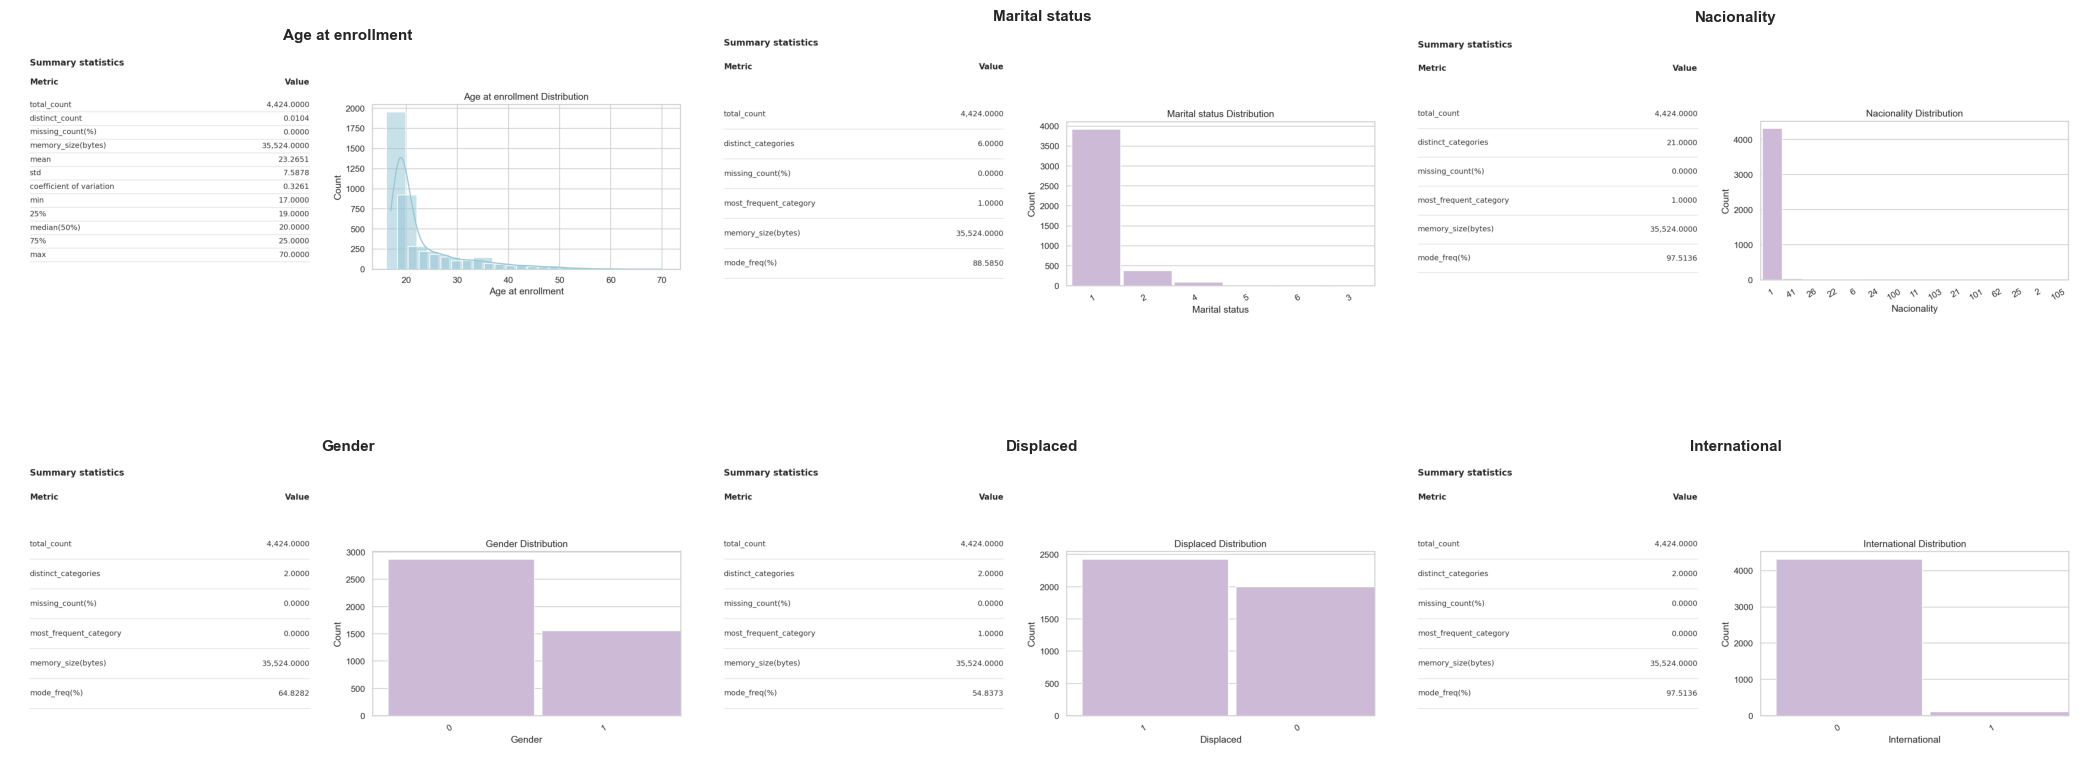

In [ ]:
explore_features_grid(
    df,
    numerical_features_list=numerical_demographic,
    categorical_features_list=categorical_demographic,
    bins=25,
    bar_width=1.8,
    n_cols=3,
    top_k_cats=15
)

**Age at enrollment**

- Strong right skew — most students are around 18–20, with a long tail up to age 70.
- Atypical older students are present in small numbers.

Older students may face more dropout risk. We might consider futuruly to create bins (e.g. ≤25, 26–35, 35+) for interpretability.

**Marital Status**
- The vast majority of students are in category 1, which likely represents "Single."

- Other categories are underrepresented → implies low demographic diversity on this variable.

*Implication* : Might have low predictive value unless married students are heavily correlated with dropout. Something to be checked later;

**Nationality**
- Extremely skewed — almost all students have the same nationality code (Portuguese).

- Few outliers at higher codes (maybe international students).

*Implication*: High imbalance makes it hard to learn patterns from nationality unless outliers behave very differently (e.g. higher dropout or success rates)


**Gender**

- Imbalanced, but still has both categories represented (likely 0 = female, 1 = male).

- Females appear to be ~65–70%.


**Displaced**

- Fairly balanced between 0 and 1 → both local and displaced students are represented.


**International**

- Almost all students are domestic (0). Very few international students.

*Implication*: Variable is nearly constant → may not contribute to the model.  Treating this variable will have to be done  carefully, we might consider delete it;

**B) Academic Backgroud Data**

Information about the student’s entry into the program – including previous qualification level (e.g. high school, prior degree), their admission grade (entry exam score or prior GPA), the degree program (course) chosen, and application details (application mode and order of preference) 

<span style="color:red">**COMO TRATAR A APPLICATION ORDER???**</span>

In [ ]:
academic_background_features = ['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification']

numerical_academic_background = []
categorical_academic_background = ['Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification']


/Users/sarataboas/Desktop/master/machine_learning/XAI_ling-TAAC/utils.py:152: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
/Users/sarataboas/Desktop/master/machine_learning/XAI_ling-TAAC/utils.py:238: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig_temp.savefig(buf, format="png", bbox_inches="tight", dpi=150)
/Users/sarataboas/Desktop/master/machine_learning/XAI_ling-TAAC/utils.py:261: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.tight_layout()
/Users/sarataboas/.pyenv/versions/machine_learning_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


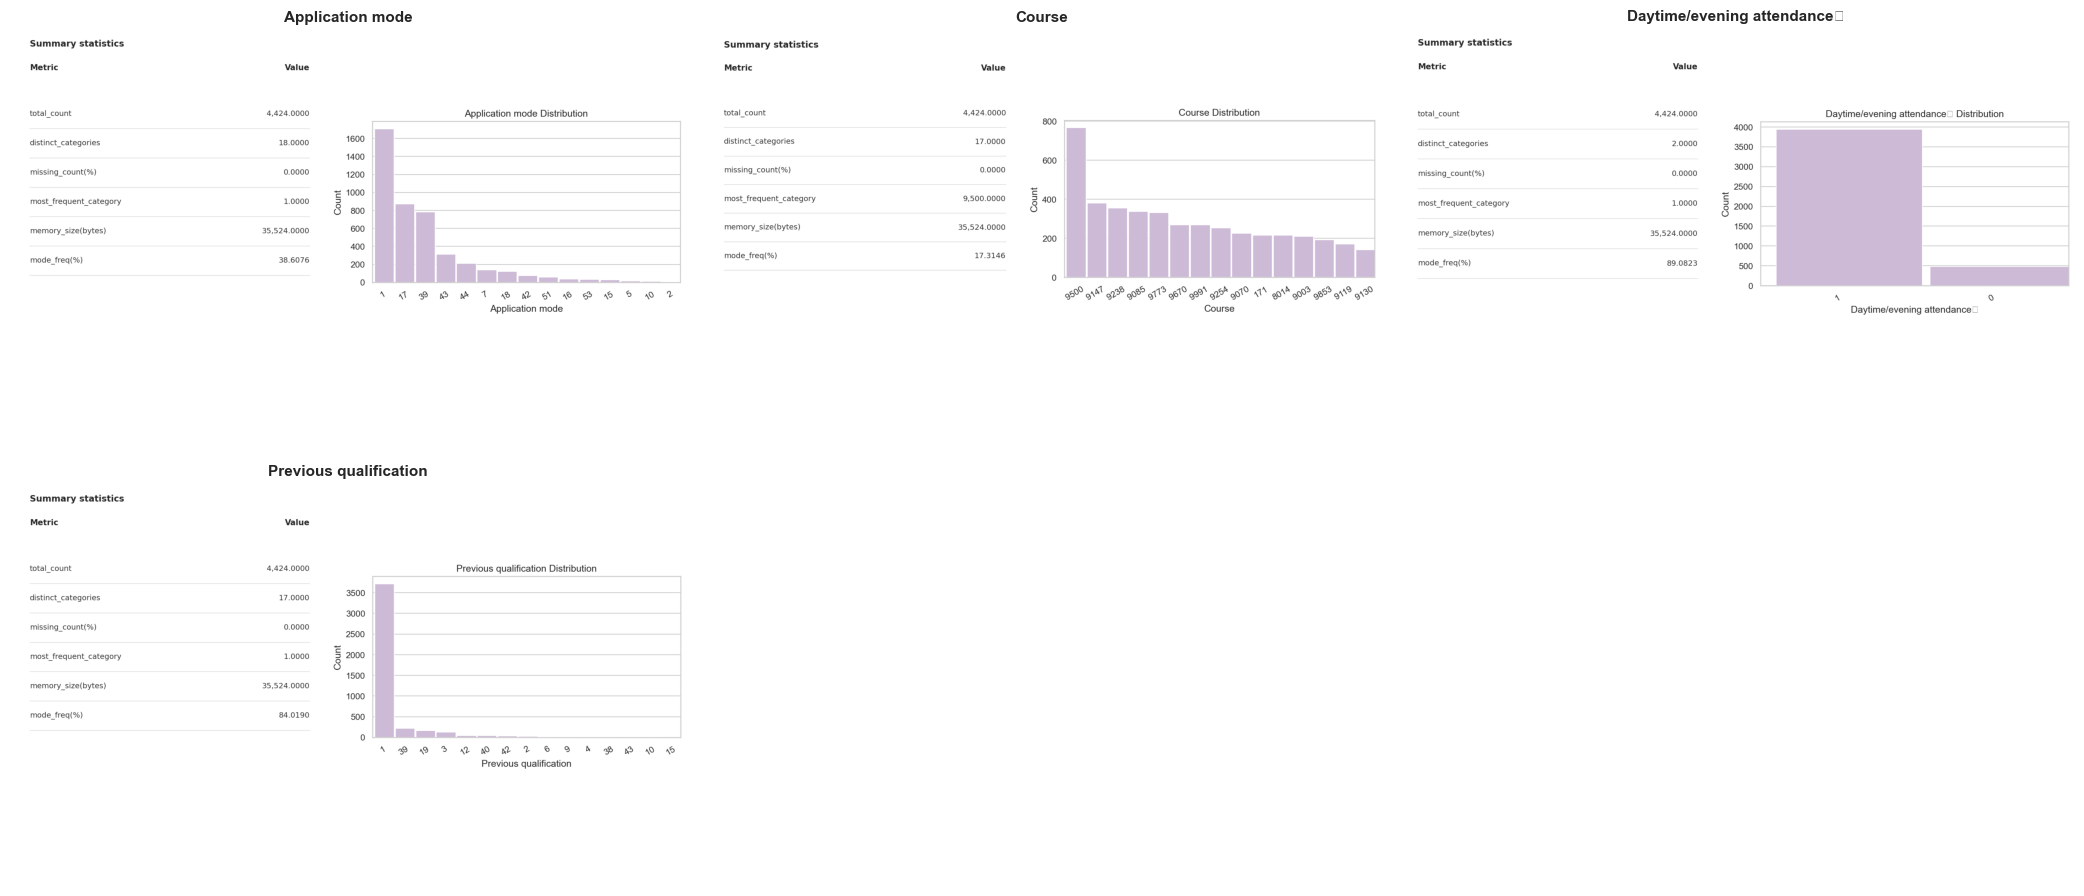

In [9]:
explore_features_grid(
    df,
    numerical_features_list=numerical_academic_background,
    categorical_features_list=categorical_academic_background,
    bins=25,
    bar_width=1.8,
    n_cols=3,
    top_k_cats=15
)

**C) Socio-Economic Data**

In [ ]:
socio_economic_features = ["Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']

numerical_socio_economic = []
categorical_socio_economic = ["Father's qualification", "Mother's qualification", "Father's occupation", "Mother's occupation", 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder']

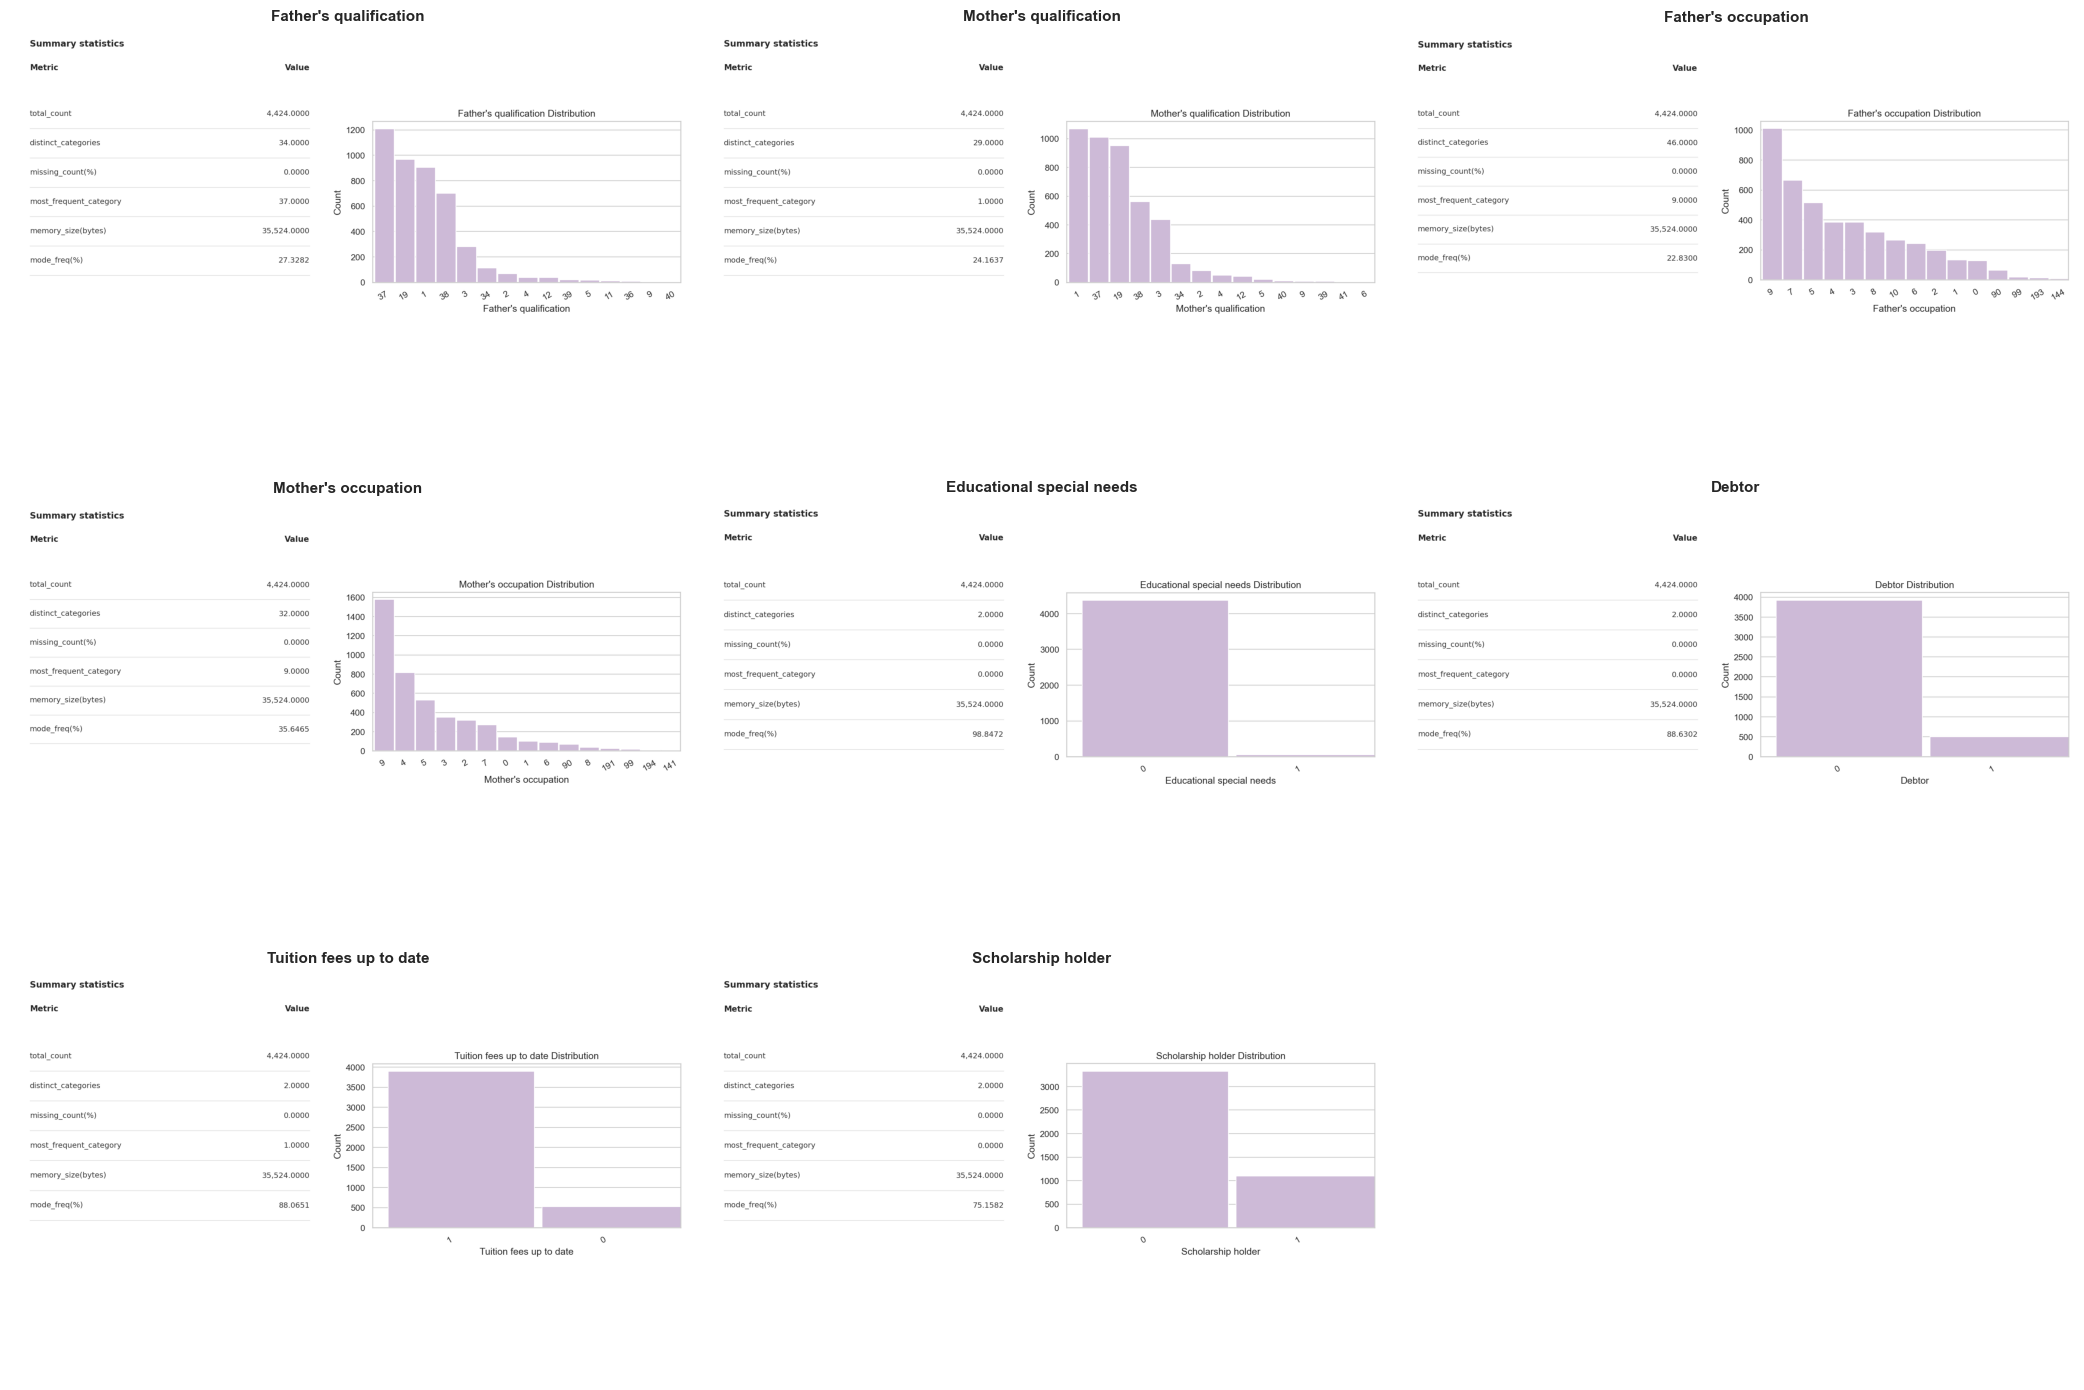

In [ ]:
explore_features_grid(
    df,
    numerical_features_list=numerical_socio_economic,
    categorical_features_list=categorical_socio_economic,
    bins=25,
    bar_width=1.8,
    n_cols=3,
    top_k_cats=15
)

**D) Macro-Economic Data**

In [13]:
macro_economic_features = ['Unemployment rate', 'Inflation rate', 'GDP']
numerical_macro_economic = ['Unemployment rate', 'Inflation rate', 'GDP']
categorical_macro_economic = []

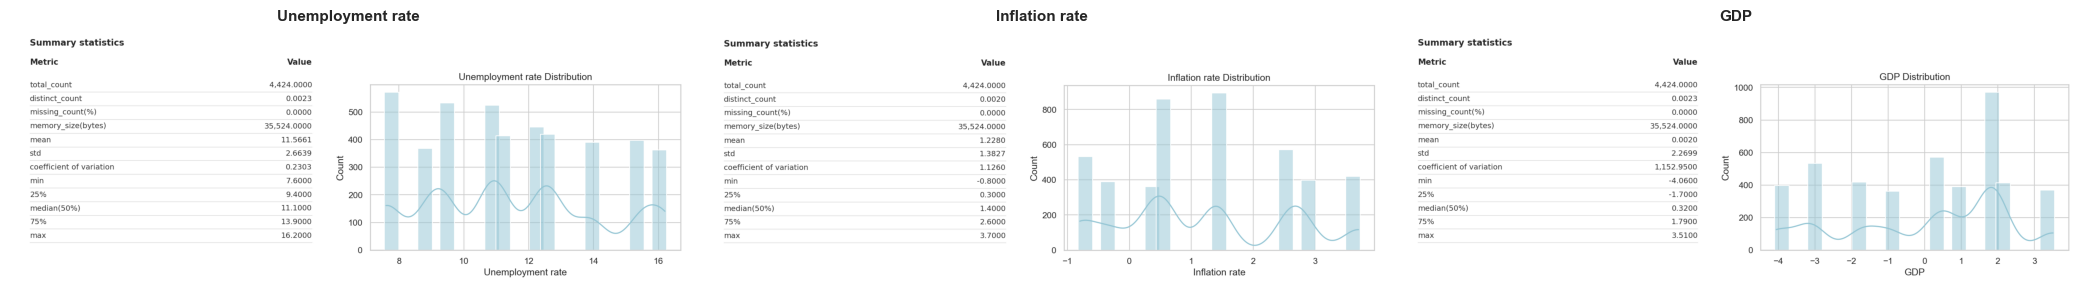

In [16]:
explore_features_grid(
    df,
    numerical_features_list=numerical_macro_economic,
    categorical_features_list=categorical_macro_economic,
    bins=25,
    bar_width=1.3,
    n_cols=3,
    top_k_cats=15
)

**E) Academic Performance Data**

In [18]:
academic_performance_features = [
    'Curricular units 1st sem (credited)', 
    'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 
    'Curricular units 1st sem (without evaluations)',

    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

numerical_academic_performance = academic_performance_features
categorical_academic_performance = []

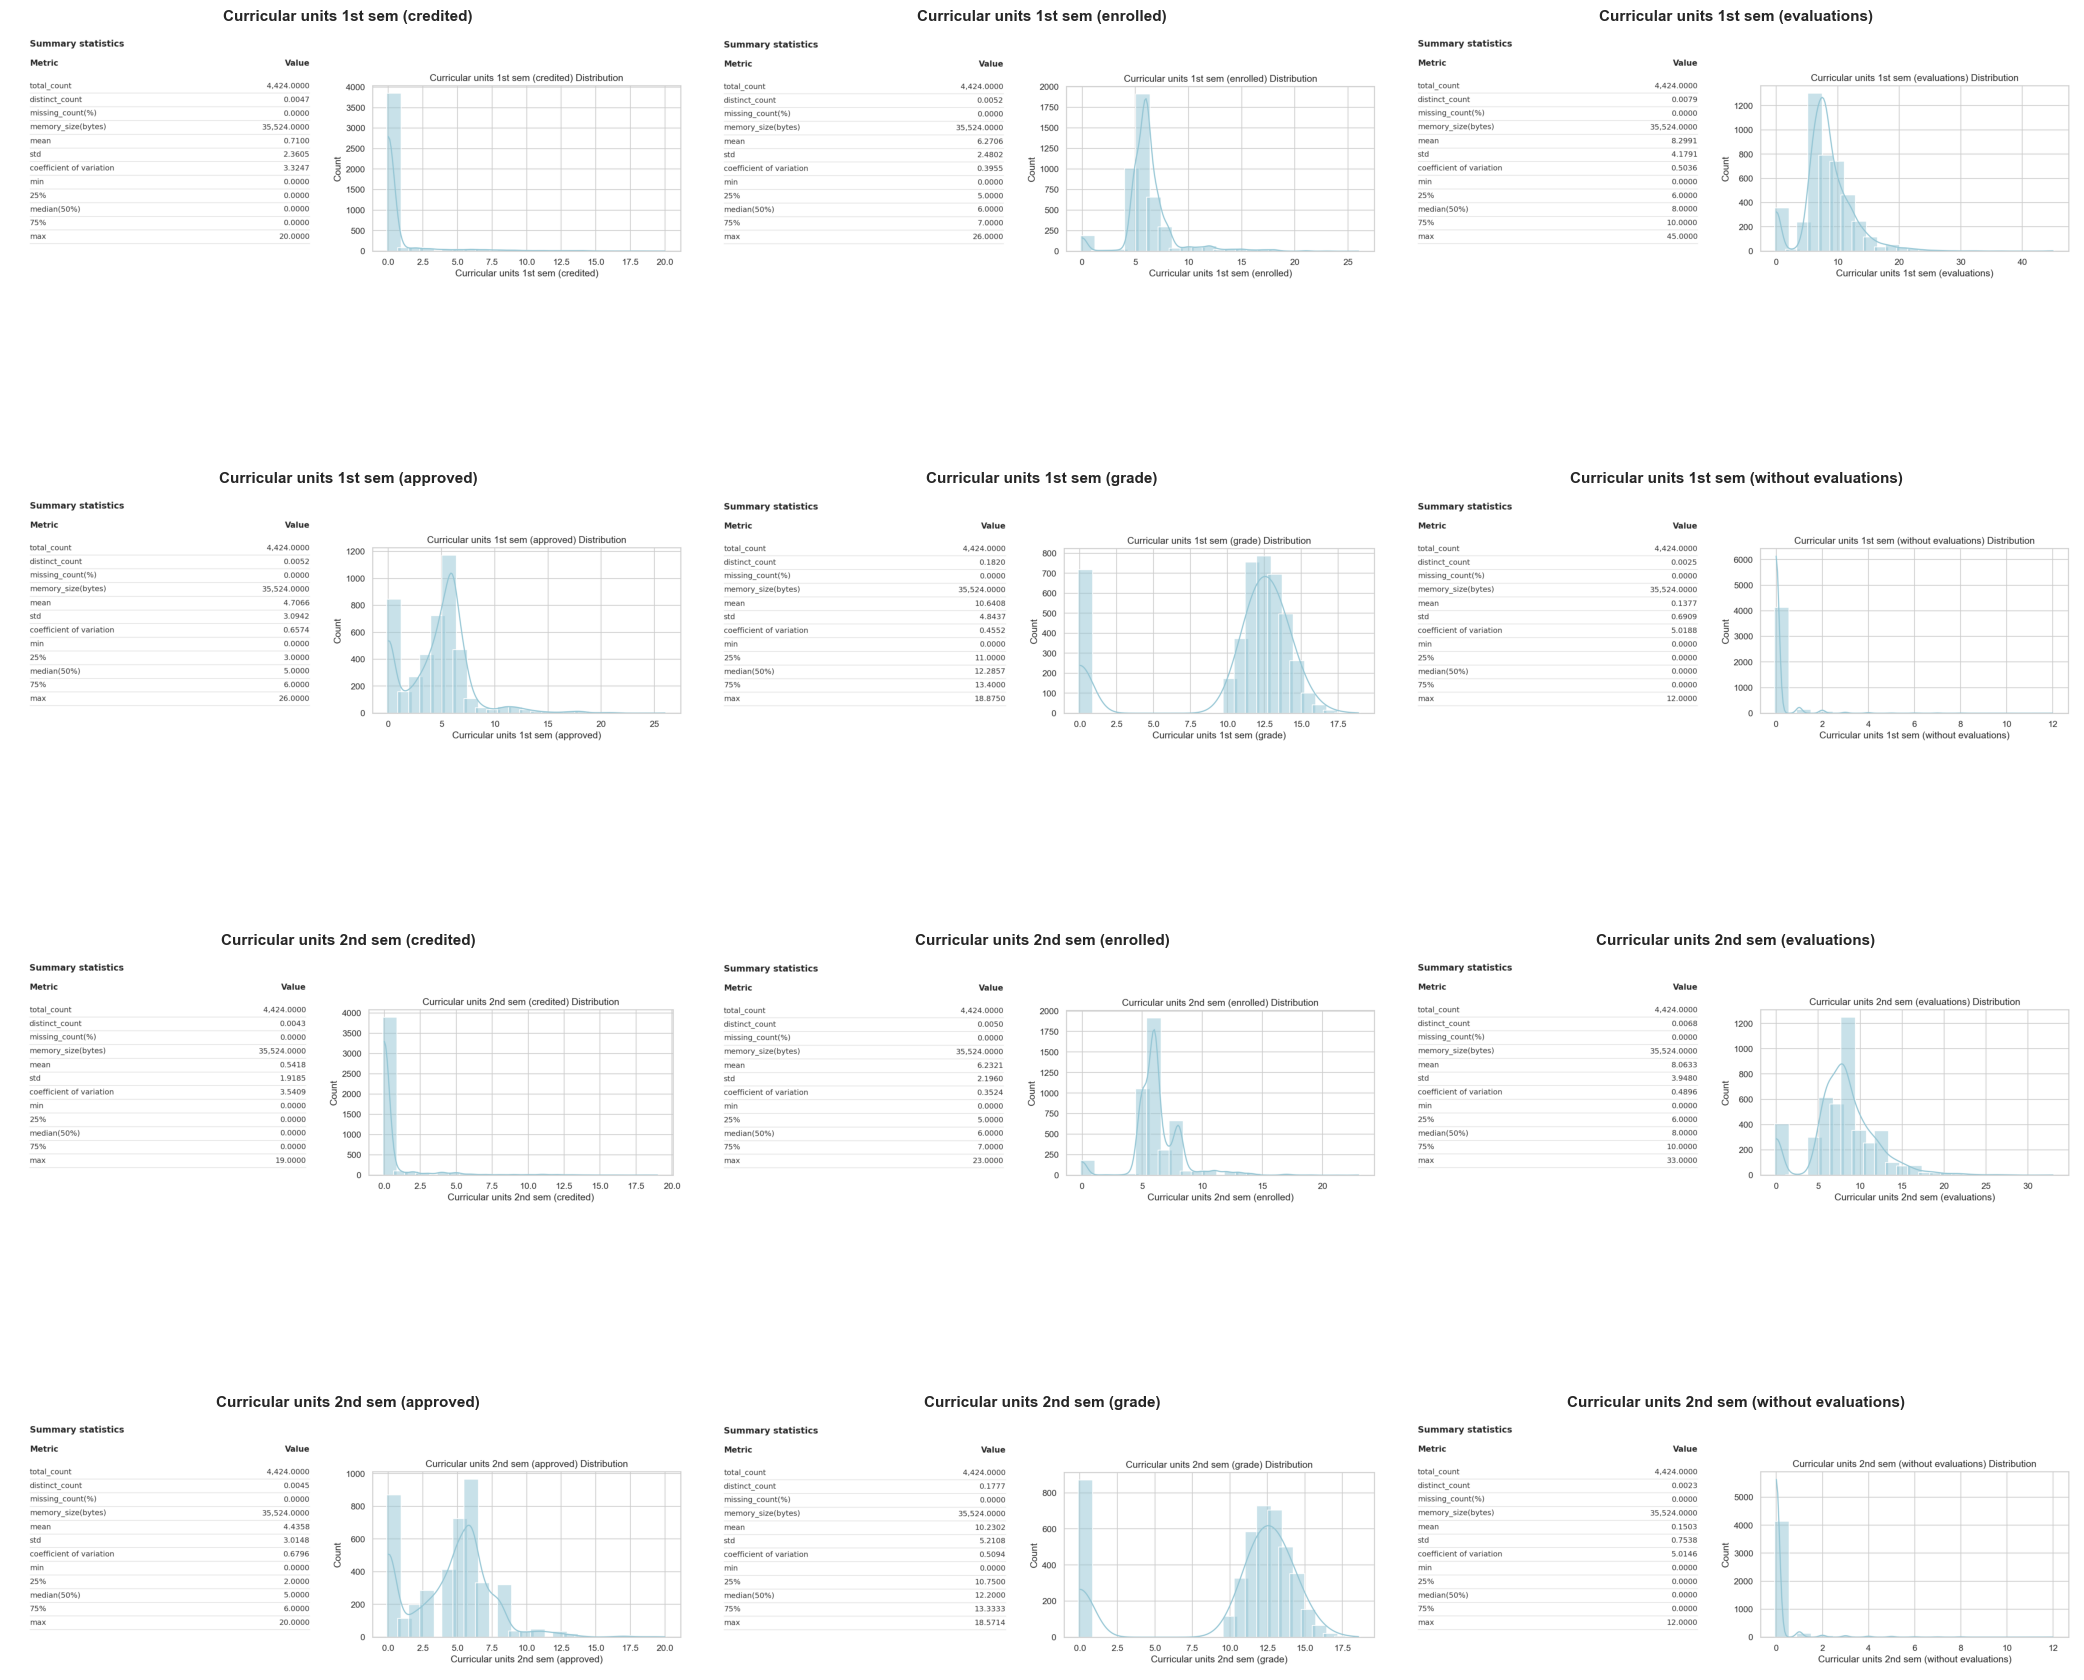

In [19]:
explore_features_grid(
    df,
    numerical_features_list=numerical_academic_performance,
    categorical_features_list=categorical_academic_performance,
    bins=25,
    bar_width=1.3,
    n_cols=3,
    top_k_cats=15
)

**2.1.2. Outliers and Anomalies Detection and Understanding** 

Outlier detection can be performed using the IQR rule (1.5×IQR beyond Q1–Q3), when considering the numerical features. On the other hand, when analysing categorical features, we will just detect the rare categories with frequency below a given threshold (1%). 

In [53]:
def detect_outliers(feature_name, df, multiplier=1.5):
    '''
    
    '''
    feature_data = df[feature_name].dropna()
    Q1, Q3 = np.percentile(feature_data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    numerical_outliers = feature_data[(feature_data < lower_bound) | (feature_data > upper_bound)]
    outliers_perc = (len(numerical_outliers) / len(feature_data)) * 100
    return numerical_outliers, outliers_perc, lower_bound, upper_bound

def rare_categories(feature_name, df, threshold=0.01):
    '''
    
    '''
    feature_data = df[feature_name].dropna()
    value_counts = feature_data.value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold]
    rare_categories_perc = len(rare_categories) / len(value_counts) * 100
    # print(rare_categories)
    # print(len(rare_categories))
    return rare_categories, rare_categories_perc
    

In [60]:
def plot_numeric_outliers(feature_name, df, multiplier=1.5, bins=30):
    """
    Visualize numeric outliers using histogram + boxplot with IQR boundaries.
    """
    outliers, outliers_perc, lower_bound, upper_bound = detect_outliers(feature_name, df, multiplier)
    feature_data = df[feature_name].dropna()

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(feature_data, bins=bins, kde=True, ax=axes[0], color="#5A9BD4")
    axes[0].axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    axes[0].axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    axes[0].set_title(f"{feature_name} Distribution\nOutliers: {outliers_perc:.2f}%")
    axes[0].legend()

    # Boxplot
    sns.boxplot(x=feature_data, ax=axes[1], color="#CAD7AC", orient="h")
    axes[1].axvline(lower_bound, color='red', linestyle='--')
    axes[1].axvline(upper_bound, color='red', linestyle='--')
    axes[1].set_title(f"{feature_name} Boxplot (IQR Outliers)")

    plt.tight_layout()
    plt.show()

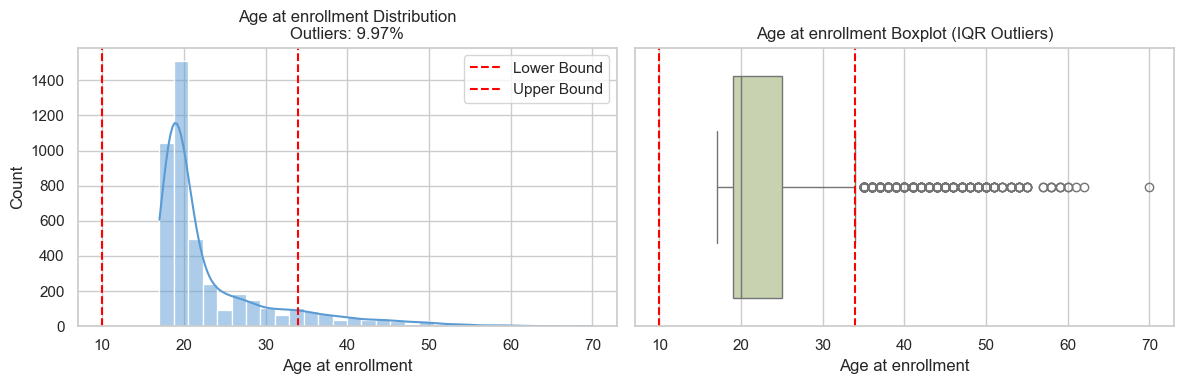

In [61]:
plot_numeric_outliers("Age at enrollment", df)

In [50]:
rare_categories, rare_categories_perc = rare_categories("Mother's occupation", df, threshold=0.01)
print(rare_categories)
print(rare_categories_perc)

Mother's occupation
8      0.008137
191    0.005877
99     0.003843
194    0.002486
141    0.001808
123    0.001582
144    0.001356
175    0.001130
192    0.001130
193    0.000904
134    0.000904
10     0.000904
143    0.000678
151    0.000678
132    0.000678
152    0.000452
122    0.000452
153    0.000452
173    0.000226
125    0.000226
131    0.000226
171    0.000226
Name: proportion, dtype: float64
68.75


In [56]:
def plot_rare_categories(feature_name, df, threshold=0.01):
    """
    Visualize category frequencies and highlight rare categories.
    """
    feature_data = df[feature_name].dropna()
    value_counts = feature_data.value_counts(normalize=True)
    rare_cats, rare_cats_perc = rare_categories(feature_name, df, threshold)

    fig, ax = plt.subplots(figsize=(8, 4))
    bars = sns.barplot(
        x=value_counts.index,
        y=value_counts.values * 100,
        palette=["#9C7EAD" if cat not in rare_cats.index else "#E57373" for cat in value_counts.index],
        ax=ax
    )
    ax.set_title(f"{feature_name} Category Distribution\nRare categories: {rare_cats_perc:.2f}% (<{threshold*100:.1f}%)")
    ax.set_ylabel("Percentage (%)")
    ax.set_xlabel(feature_name)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

#### **2.2. Multivariate Analysis**

Analysing the interactions between features and analysing their correlations.

- ***Analysing Interactions*** - ver site Miriam (nao sei como se faz o plot)

- ***Analysing Correlations*** - correlation matrix or heatmap
    
    Important about correlations:
    - Numeric vs. Numeric correlations: measured using Spearman's rank correlation coefficient
    - Categorical vs. Categorical correlations: measured using Cramer's V
    - Numerical vs. Categorical correlations: also use Cramer's V, where the numeric feature is first discritized

In [ ]:
### Interactions

### Correlations

# matrix ricardo

#### **3. Data Quality Evaluation**

Crucial to find 'complicating factors' at the begining of our project, i.e. errors that may occur during the data collection or even some intrinsic characteristics that simply reflect the nature of the data. These include: 

- missing data
- imbalanced data
- constant values
- duplicates
- highly correlated or redundant features
- noisy data

### **Dataset Summarization and Dimensionality Reduction**

**PCA and t-SNE (UMAP)** - represent the data in a reduced dimension to better understand and visualize data structures

- illustrates the global dataset structure 

If the underlying structure of a dataset is known to be relatively linear, PCA is the method of choice, otherwise, it is better to move on with t-SNE, as it is able to understand nonlinear data. However, t-SNE is computationally slow and expensive, when applied to large datasets. 

Recent alternatives to t-SNE with large datasets: UMAP

In [ ]:
### Conclusion on data linearity 
### Choice between PCA vs t-SNE (UMAP)

**Prototypes and Criticisms**

- Summarizes the dataset by building a reduced representative set of our data